# EMAIL SPAM CLASSIFIER

<b>Problem Statement:</b>
    
The SMS Spam Collection is a set of SMS tagged messages that have been collected for SMS Spam research. It contains one set of SMS messages in English of 5,574 messages, tagged according being ham (legitimate) or spam.

<b><u>What is a Spam Filtering?</u></b>

Spam Detector is used to detect unwanted, malicious and virus infected texts and helps to separate them from the nonspam texts. It uses a binary type of classification containing the labels such as ‘ham’ (nonspam) and spam. Application of this can be seen in Google Mail (GMAIL) where it segregates the spam emails in order to prevent them from getting into the user’s inbox.

The files contain one message per line. Each line is composed by two columns: v1 contains the label (ham or spam) and v2 contains the raw text.

This corpus has been collected from free or free for research sources at the Internet:

A collection of 5573 rows SMS spam messages was manually extracted from the Grumbletext Web site. This is a UK forum in which cell phone users make public claims about SMS spam messages, most of them without reporting the very spam message received. The identification of the text of spam messages in the claims is a very hard and time-consuming task, and it involved carefully scanning hundreds of web pages.

A subset of 3,375 SMS randomly chosen ham messages of the NUS SMS Corpus (NSC), which is a dataset of about 10,000 legitimate messages collected for research at the Department of Computer Science at the National University of Singapore. The messages largely originate from Singaporeans and mostly from students attending the University. These messages were collected from volunteers who were made aware that their contributions were going to be made publicly available.

In [118]:
import pandas as pd
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

<b>Loading the dataset</b>

In [119]:
df=pd.read_csv("spam.tsv", sep="\t")
df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [120]:
df.shape

(5572, 5)

The dataset contains 5572 rows and 5 columns.

# DATA CLEANING

In [121]:
df.info

<bound method DataFrame.info of         v1                                                 v2 Unnamed: 2  \
0      ham  Go until jurong point, crazy.. Available only ...        NaN   
1      ham                      Ok lar... Joking wif u oni...        NaN   
2     spam  Free entry in 2 a wkly comp to win FA Cup fina...        NaN   
3      ham  U dun say so early hor... U c already then say...        NaN   
4      ham  Nah I don't think he goes to usf, he lives aro...        NaN   
...    ...                                                ...        ...   
5567  spam  This is the 2nd time we have tried 2 contact u...        NaN   
5568   ham              Will Ì_ b going to esplanade fr home?        NaN   
5569   ham  Pity, * was in mood for that. So...any other s...        NaN   
5570   ham  The guy did some bitching but I acted like i'd...        NaN   
5571   ham                         Rofl. Its true to its name        NaN   

     Unnamed: 3 Unnamed: 4  
0           NaN        NaN

In [122]:
df.drop(columns=['Unnamed: 2','Unnamed: 3','Unnamed: 4'],inplace=True)

In [123]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   v1      5572 non-null   object
 1   v2      5572 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB


In [124]:
df.sample(5)

,v1,v2
877,spam,Sunshine Quiz Wkly Q! Win a top Sony DVD playe...
351,ham,If you're not in my car in an hour and a half ...
3792,ham,Hey are you angry with me. Reply me dr.
4232,ham,My love ... I hope your not doing anything dra...
4601,ham,\Hey j! r u feeling any better


In [125]:
df.rename(columns={'v1':'Target','v2':'Text'},inplace=True)

In [126]:
df.head()

,Target,Text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


<b>Checking the null values</b>

In [127]:
df.isnull().sum()

Target    0
Text      0
dtype: int64

<AxesSubplot:>

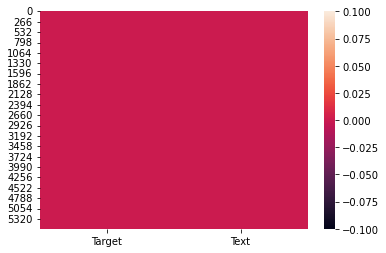

In [11]:
sns.heatmap(df.isnull())

As we see there is no null values in our dataset.

<b>Checking for duplicate values</b>

In [128]:
df.duplicated().sum()

403

In [129]:
df=df.drop_duplicates(keep='first')

In [130]:
df.duplicated().sum()

0

In [131]:
df.shape

(5169, 2)

# Exploratory Data Analysis

In [132]:
df['Target'].value_counts()

ham     4516
spam     653
Name: Target, dtype: int64

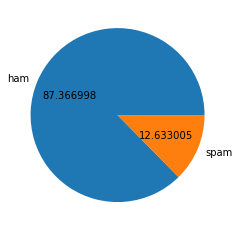

In [133]:
plt.pie(df['Target'].value_counts(),labels=['ham','spam'],autopct="%3f")
plt.show()

In [134]:
import nltk

In [135]:
df['Num_characters']=df['Text'].apply(len)

In [136]:
df.head()

,Target,Text,Num_characters
0,ham,"Go until jurong point, crazy.. Available only ...",111
1,ham,Ok lar... Joking wif u oni...,29
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,ham,U dun say so early hor... U c already then say...,49
4,ham,"Nah I don't think he goes to usf, he lives aro...",61


In [137]:
#For number of words
df['Num_words']=df['Text'].apply(lambda x:len(nltk.word_tokenize(x)))

In [138]:
df.head()

,Target,Text,Num_characters,Num_words
0,ham,"Go until jurong point, crazy.. Available only ...",111,24
1,ham,Ok lar... Joking wif u oni...,29,8
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155,37
3,ham,U dun say so early hor... U c already then say...,49,13
4,ham,"Nah I don't think he goes to usf, he lives aro...",61,15


In [139]:
#For number of sentences
df['Num_sentence']=df['Text'].apply(lambda x:len(nltk.sent_tokenize(x)))

In [140]:
df.head()

,Target,Text,Num_characters,Num_words,Num_sentence
0,ham,"Go until jurong point, crazy.. Available only ...",111,24,2
1,ham,Ok lar... Joking wif u oni...,29,8,2
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,ham,U dun say so early hor... U c already then say...,49,13,1
4,ham,"Nah I don't think he goes to usf, he lives aro...",61,15,1


In [141]:
df[['Num_characters','Num_words','Num_sentence']].describe()

,Num_characters,Num_words,Num_sentence
count,5169.000000,5169.000000,5169.000000
mean,78.977945,18.453279,1.947185
std,58.236293,13.324793,1.362406
min,2.000000,1.000000,1.000000
25%,36.000000,9.000000,1.000000
50%,60.000000,15.000000,1.000000
75%,117.000000,26.000000,2.000000
max,910.000000,220.000000,28.000000


In [142]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

In [143]:
df['Target'] = encoder.fit_transform(df['Target'])

In [144]:
df.head()

,Target,Text,Num_characters,Num_words,Num_sentence
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1


In [145]:
#For Ham
df[df['Target']==0][['Num_characters','Num_words','Num_sentence']].describe()

,Num_characters,Num_words,Num_sentence
count,4516.000000,4516.000000,4516.000000
mean,70.459256,17.120903,1.799601
std,56.358207,13.493725,1.278465
min,2.000000,1.000000,1.000000
25%,34.000000,8.000000,1.000000
50%,52.000000,13.000000,1.000000
75%,90.000000,22.000000,2.000000
max,910.000000,220.000000,28.000000


In [146]:
#For spam 
df[df['Target']==1][['Num_characters','Num_words','Num_sentence']].describe()

,Num_characters,Num_words,Num_sentence
count,653.000000,653.000000,653.000000
mean,137.891271,27.667688,2.967841
std,30.137753,7.008418,1.483201
min,13.000000,2.000000,1.000000
25%,132.000000,25.000000,2.000000
50%,149.000000,29.000000,3.000000
75%,157.000000,32.000000,4.000000
max,224.000000,46.000000,8.000000


<AxesSubplot:xlabel='Num_characters', ylabel='Count'>

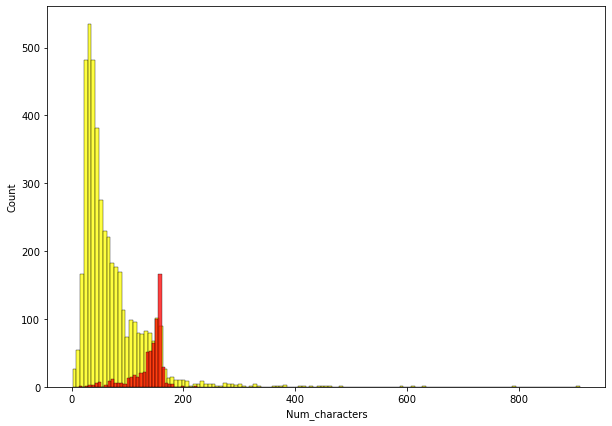

In [147]:
plt.figure(figsize=(10,7))
sns.histplot(df[df['Target'] == 0]['Num_characters'],color='yellow')
sns.histplot(df[df['Target'] == 1]['Num_characters'],color='red')

<AxesSubplot:xlabel='Num_words', ylabel='Count'>

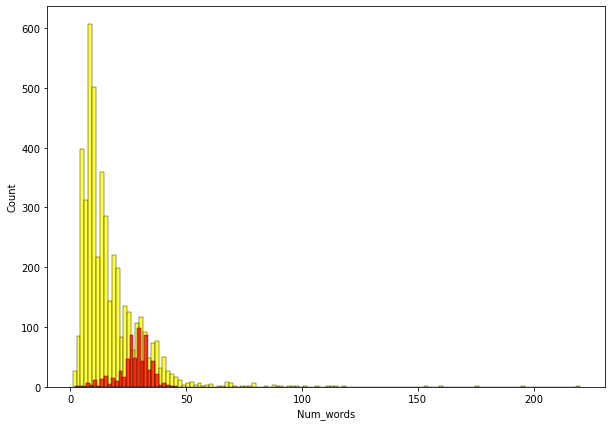

In [148]:
plt.figure(figsize=(10,7))
sns.histplot(df[df['Target'] == 0]['Num_words'],color='yellow')
sns.histplot(df[df['Target'] == 1]['Num_words'],color='red')

<AxesSubplot:xlabel='Num_sentence', ylabel='Count'>

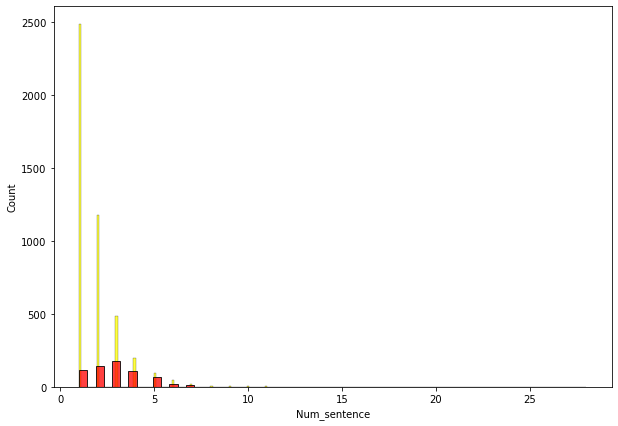

In [149]:
plt.figure(figsize=(10,7))
sns.histplot(df[df['Target'] == 0]['Num_sentence'],color='yellow')
sns.histplot(df[df['Target'] == 1]['Num_sentence'],color='red')

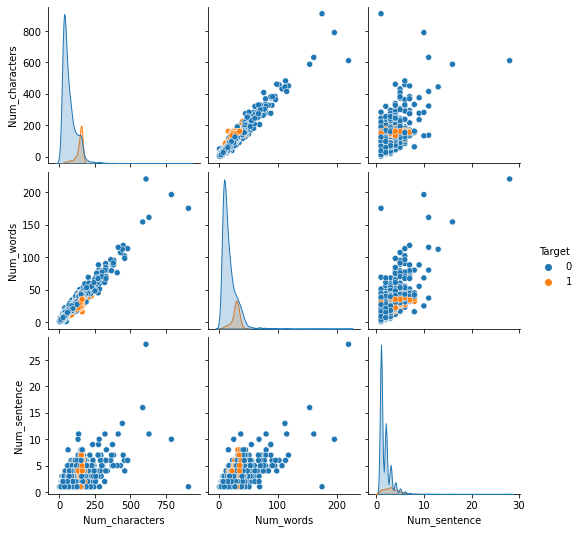

In [150]:
sns.pairplot(df,hue='Target')

<AxesSubplot:>

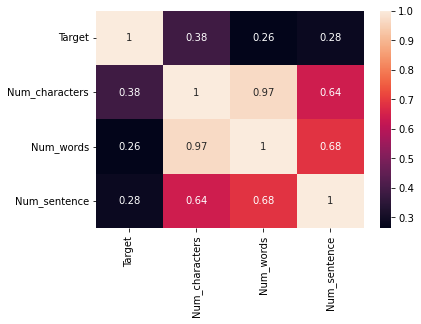

In [151]:
sns.heatmap(df.corr(),annot=True)

# Data Preprocessing

<b>Lower case -Tokenization -Removing special characters -Removing stop words and punctuation -Stemming</b>

In [152]:
def transform_Text(Text):
    Text = Text.lower()
    Text = nltk.word_tokenize(Text)
    
    y = []
    for i in Text:
        if i.isalnum():
            y.append(i)
    
    Text = y[:]
    y.clear()
    
    for i in Text:
        if i not in stopwords.words('english') and i not in string.punctuation:
            y.append(i)
            
    Text = y[:]
    y.clear()
    
    for i in Text:
        y.append(ps.stem(i))
    
            
    return " ".join(y)

In [153]:
from nltk.corpus import stopwords

In [154]:
import string

In [155]:
from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()
ps.stem('playing')

'play'

In [156]:
transform_Text("I'm gonna be home soon and i don't want to talk about this stuff anymore tonight, k? I've cried enough today.")

'gon na home soon want talk stuff anymor tonight k cri enough today'

In [157]:
transform_Text("Hello! I am Nikhil Sharma.I am computer science engineering students.I enjoy coding.")

'hello nikhil comput scienc engin enjoy code'

In [158]:
df['transformed_Text'] = df['Text'].apply(transform_Text)

In [159]:
df.head()

,Target,Text,Num_characters,Num_words,Num_sentence,transformed_Text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


In [160]:
from wordcloud import WordCloud
wc = WordCloud(width=500,height=500,min_font_size=10,background_color='white')

In [161]:
#For SPAM WORDS
spam_wc = wc.generate(df[df['Target'] == 1]['transformed_Text'].str.cat(sep=" "))

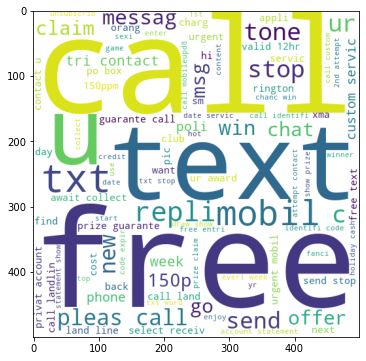

In [162]:
plt.figure(figsize=(15,6))
plt.imshow(spam_wc)

In [163]:
#For HAM WORDS
ham_wc = wc.generate(df[df['Target'] == 1]['transformed_Text'].str.cat(sep=" "))

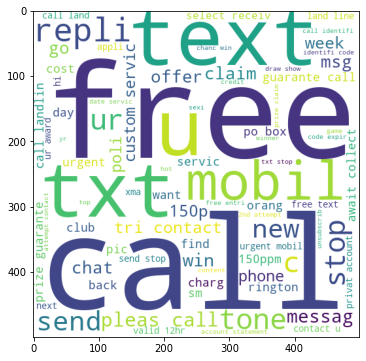

In [164]:
plt.figure(figsize=(15,6))
plt.imshow(ham_wc)

In [165]:
df.head()

,Target,Text,Num_characters,Num_words,Num_sentence,transformed_Text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


In [166]:
spam_corpus = []
for msg in df[df['Target'] == 1]['transformed_Text'].tolist():
    for word in msg.split():
        spam_corpus.append(word)

In [167]:
len(spam_corpus)

9939

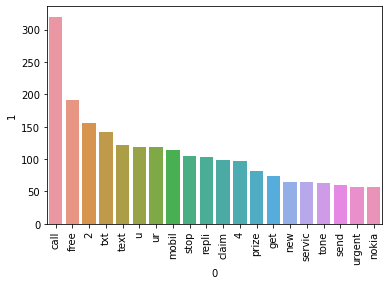

In [168]:
from collections import Counter
sns.barplot(pd.DataFrame(Counter(spam_corpus).most_common(20))[0],pd.DataFrame(Counter(spam_corpus).most_common(20))[1])
plt.xticks(rotation='vertical')
plt.show()

In [169]:
ham_corpus = []
for msg in df[df['Target'] == 0]['transformed_Text'].tolist():
    for word in msg.split():
        ham_corpus.append(word)

In [170]:
len(ham_corpus)

35394

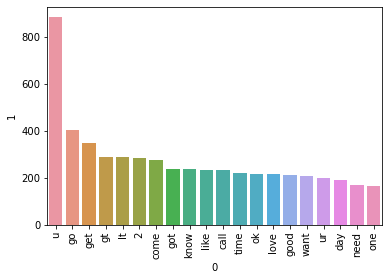

In [171]:
from collections import Counter
sns.barplot(pd.DataFrame(Counter(ham_corpus).most_common(20))[0],pd.DataFrame(Counter(ham_corpus).most_common(20))[1])
plt.xticks(rotation='vertical')
plt.show()

# Model Building

In [172]:
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
cv = CountVectorizer()
tfidf = TfidfVectorizer(max_features=3000)

In [173]:
X = tfidf.fit_transform(df['transformed_Text']).toarray()

In [174]:
X.shape

(5169, 3000)

In [175]:
y = df['Target'].values

In [176]:
from sklearn.model_selection import train_test_split

In [177]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2)

In [178]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score

# MultibinomialNB

In [179]:
mnb = MultinomialNB()

In [180]:
mnb.fit(X_train,y_train)
y_pred2 = mnb.predict(X_test)
print(accuracy_score(y_test,y_pred2))
print(confusion_matrix(y_test,y_pred2))
print(precision_score(y_test,y_pred2))

0.9709864603481625
[[896   0]
 [ 30 108]]
1.0


In [181]:
scr=cross_val_score(mnb, X, y, cv=5)
print("Cross validation score of MultibinomialNB model:", scr.mean())

Cross validation score of MultibinomialNB model: 0.9729145172555194


In [182]:
mnb = MultinomialNB()

In [183]:
clfs = {'NB': mnb}

In [184]:
def train_classifier(clf,X_train,y_train,X_test,y_test):
    clf.fit(X_train,y_train)
    y_pred = clf.predict(X_test)
    accuracy = accuracy_score(y_test,y_pred)
    precision = precision_score(y_test,y_pred)
    
    return accuracy,precision

In [185]:
train_classifier(mnb,X_train,y_train,X_test,y_test)

(0.9709864603481625, 1.0)

# GaussianNB

In [186]:
gnb=GaussianNB()
gnb.fit(X_train, y_train)
predgnb=gnb.predict(X_test)
print("Accuaracy", accuracy_score(y_test, predgnb)*100)
print(confusion_matrix(y_test,predgnb))
print(precision_score(y_test,predgnb))

Accuaracy 86.94390715667312
[[788 108]
 [ 27 111]]
0.5068493150684932


In [187]:
scr=cross_val_score(gnb, X, y, cv=5)
print("Cross validation score of GaussianNB model:", scr.mean())

Cross validation score of GaussianNB model: 0.8653505872924627


In [188]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC

from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
from sklearn.model_selection import cross_val_score

# Decision Tree Classifier

In [189]:
dtr=DecisionTreeClassifier()
dtr.fit(X_train, y_train)
preddtr=dtr.predict(X_test)
print("Accuaracy", accuracy_score(y_test, preddtr)*100)
print(confusion_matrix(y_test,preddtr))
print(classification_report(y_test,preddtr))

Accuaracy 94.87427466150871
[[870  26]
 [ 27 111]]
              precision    recall  f1-score   support

           0       0.97      0.97      0.97       896
           1       0.81      0.80      0.81       138

    accuracy                           0.95      1034
   macro avg       0.89      0.89      0.89      1034
weighted avg       0.95      0.95      0.95      1034



In [190]:
scr=cross_val_score(dtr, X, y, cv=5)
print("Cross validation score of Decision Tree Classifier model:", scr.mean())

Cross validation score of Decision Tree Classifier model: 0.9475709703573187


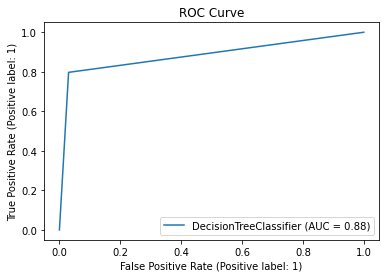

In [78]:
from sklearn.metrics import plot_roc_curve

plot_roc_curve(dtr, X_test, y_test)
plt.title("ROC Curve")
plt.show()

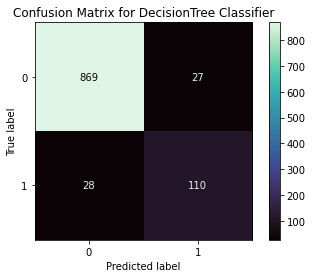

In [80]:
from sklearn import metrics

metrics.plot_confusion_matrix(dtr, X_test, y_test, cmap='mako')
plt.title('Confusion Matrix for DecisionTree Classifier')
plt.show()

# Logistic Regression

In [84]:
LR=LogisticRegression()
LR.fit(X_train, y_train)
predlr=LR.predict(X_test)
print("Accuaracy", accuracy_score(y_test, predlr)*100)
print(confusion_matrix(y_test,predlr))
print(classification_report(y_test,predlr))

Accuaracy 95.64796905222437
[[894   2]
 [ 43  95]]
              precision    recall  f1-score   support

           0       0.95      1.00      0.98       896
           1       0.98      0.69      0.81       138

    accuracy                           0.96      1034
   macro avg       0.97      0.84      0.89      1034
weighted avg       0.96      0.96      0.95      1034



In [85]:
scr=cross_val_score(LR, X, y, cv=5)
print("Cross validation score of Logistic Regression model:", scr.mean())

Cross validation score of Logistic Regression model: 0.9556979446168133


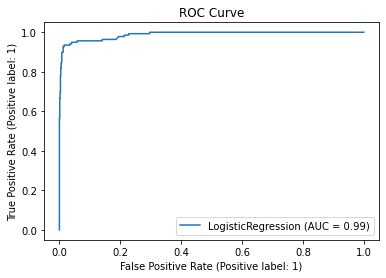

In [86]:
from sklearn.metrics import plot_roc_curve

plot_roc_curve(LR, X_test, y_test)
plt.title("ROC Curve")
plt.show()

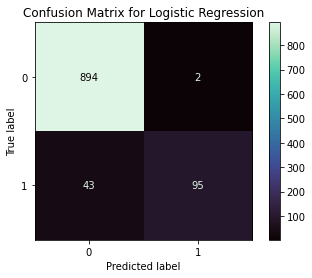

In [87]:
from sklearn import metrics

metrics.plot_confusion_matrix(LR, X_test, y_test, cmap='mako')
plt.title('Confusion Matrix for Logistic Regression')
plt.show()

# KNNeighbors Classifier

In [88]:
knc=KNeighborsClassifier()
knc.fit(X_train, y_train)
predknc=knc.predict(X_test)
print("Accuaracy", accuracy_score(y_test, predknc)*100)
print(confusion_matrix(y_test,predknc))
print(classification_report(y_test,predknc))

Accuaracy 90.52224371373308
[[896   0]
 [ 98  40]]
              precision    recall  f1-score   support

           0       0.90      1.00      0.95       896
           1       1.00      0.29      0.45       138

    accuracy                           0.91      1034
   macro avg       0.95      0.64      0.70      1034
weighted avg       0.91      0.91      0.88      1034



In [89]:
scr=cross_val_score(knc, X, y, cv=5)
print("Cross validation score of KNeighbors Classifier model:", scr.mean())

Cross validation score of KNeighbors Classifier model: 0.9113957019890986


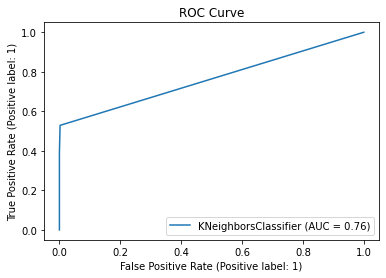

In [90]:
plot_roc_curve(knc, X_test, y_test)
plt.title("ROC Curve")
plt.show()

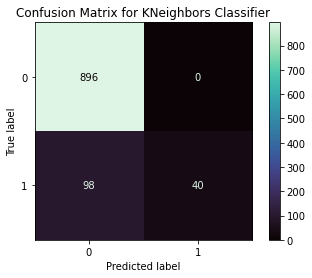

In [91]:
metrics.plot_confusion_matrix(knc, X_test, y_test, cmap='mako')
plt.title('Confusion Matrix for KNeighbors Classifier')
plt.show()

# Support Vector Classifier

In [93]:
sv=SVC()
sv.fit(X_train, y_train)
predsvc=sv.predict(X_test)
print("Accuaracy", accuracy_score(y_test, predsvc)*100)
print(confusion_matrix(y_test,predsvc))
print(classification_report(y_test,predsvc))

Accuaracy 97.29206963249516
[[894   2]
 [ 26 112]]
              precision    recall  f1-score   support

           0       0.97      1.00      0.98       896
           1       0.98      0.81      0.89       138

    accuracy                           0.97      1034
   macro avg       0.98      0.90      0.94      1034
weighted avg       0.97      0.97      0.97      1034



In [94]:
scr=cross_val_score(sv, X, y, cv=5)
print("Cross validation score of Support Vector Classifier model:", scr.mean())

Cross validation score of Support Vector Classifier model: 0.9723333102398415


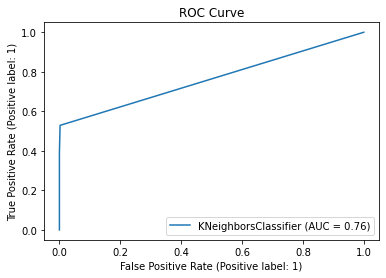

In [95]:
plot_roc_curve(knc, X_test, y_test)
plt.title("ROC Curve")
plt.show()

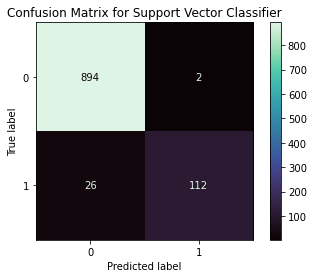

In [96]:
metrics.plot_confusion_matrix(sv, X_test, y_test, cmap='mako')
plt.title('Confusion Matrix for Support Vector Classifier')
plt.show()

<b>From the above model comparisons it is clear that Linear Support Vector Classifier performs better with Accuracy Score: 97.29206963249516</b>

# Saving the Model

In [191]:
import joblib

joblib.dump(mnb,'spammodel.obj')

email_loadmodel=joblib.load('spammodel.obj')
email_loadmodel.predict(X_test)

array([0, 0, 0, ..., 0, 0, 0])

In [192]:
conclusion=pd.DataFrame([email_loadmodel.predict(X_test)[:],y_pred2[:]],index=['Predicted','Original'])
conclusion

,0,1,2,3,4,5,6,7,8,9,...,1024,1025,1026,1027,1028,1029,1030,1031,1032,1033
Predicted,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Original,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
